C:\Users\subbu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


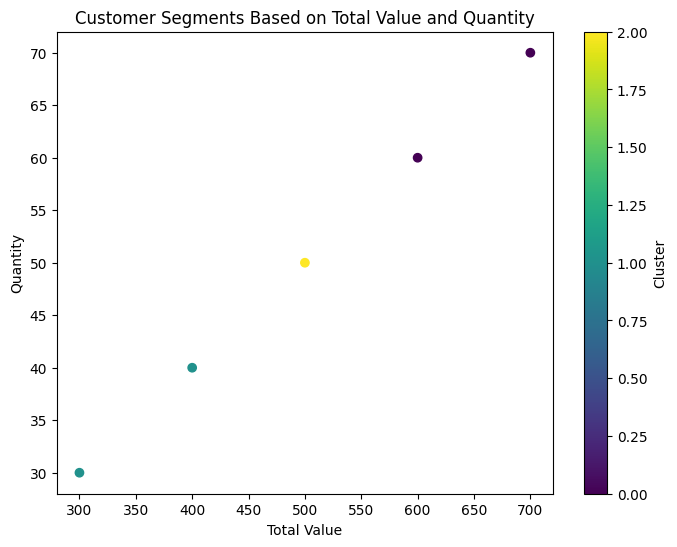

   CustomerID  TotalValue  Quantity  Cluster
0           1         500        50        2
1           2         700        70        0
2           3         300        30        1
3           4         400        40        1
4           5         600        60        0


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

customer_data = pd.read_csv('C:/Users/subbu/OneDrive/Desktop/eCommerce_Assignment/data/merged_dataset.csv')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalValue', 'Quantity']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(customer_data['TotalValue'], customer_data['Quantity'], c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.title('Customer Segments Based on Total Value and Quantity')
plt.colorbar(label='Cluster')
plt.show()

print(customer_data.head())


In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.19999999999999996


C:\Users\subbu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


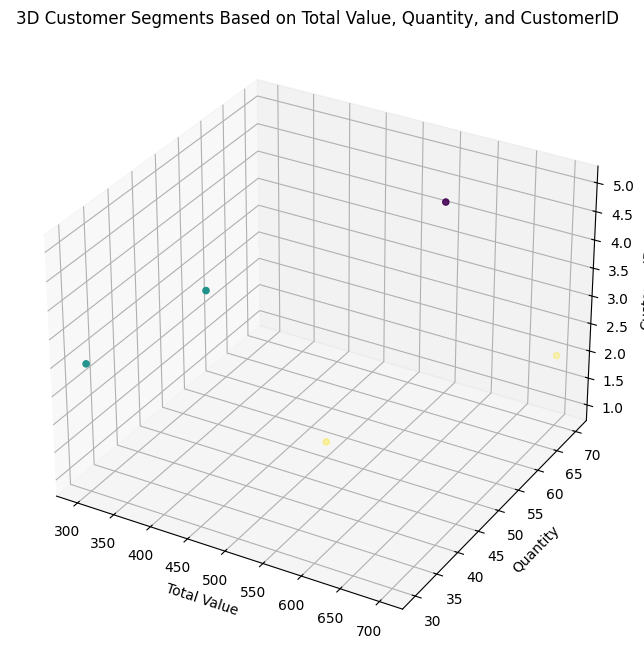

In [16]:
scaled_data_3d = scaler.fit_transform(customer_data[['TotalValue', 'Quantity', 'CustomerID']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster_3D'] = kmeans.fit_predict(scaled_data_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data['TotalValue'], customer_data['Quantity'], customer_data['CustomerID'], c=customer_data['Cluster_3D'], cmap='viridis')
ax.set_xlabel('Total Value')
ax.set_ylabel('Quantity')
ax.set_zlabel('CustomerID')
plt.title('3D Customer Segments Based on Total Value, Quantity, and CustomerID')
plt.show()


C:\Users\subbu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


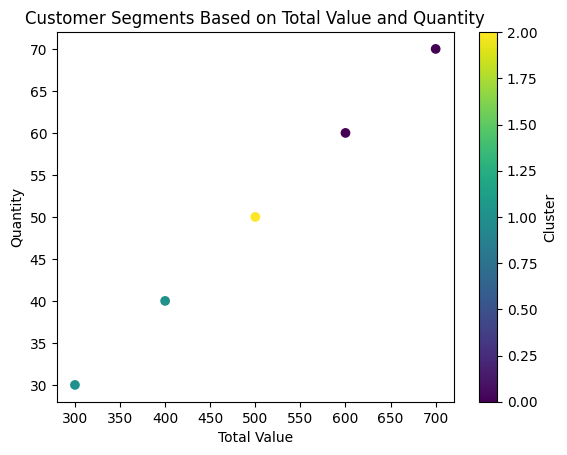

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalValue', 'Quantity']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.scatter(customer_data['TotalValue'], customer_data['Quantity'], c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.title('Customer Segments Based on Total Value and Quantity')
plt.colorbar(label='Cluster')
plt.show()


In [21]:
cluster_profiles = customer_data.groupby('Cluster').mean()
print(cluster_profiles)


         CustomerID  TotalValue  Quantity  Cluster_3D
Cluster                                              
0               3.5       650.0      65.0         1.0
1               3.5       350.0      35.0         1.0
2               1.0       500.0      50.0         2.0


In [22]:
customer_data.to_csv('customer_segments_with_clusters.csv', index=False)


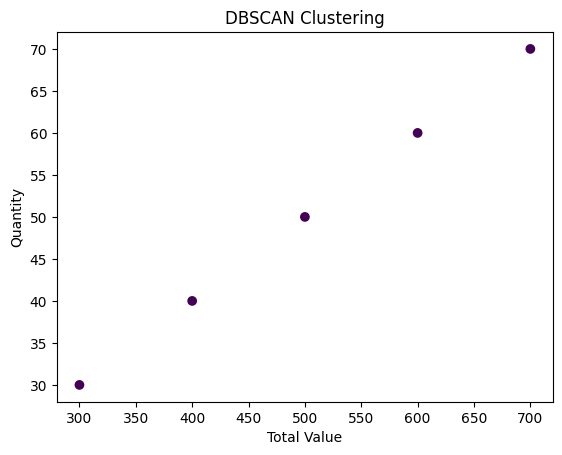

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

plt.scatter(customer_data['TotalValue'], customer_data['Quantity'], c=customer_data['DBSCAN_Cluster'], cmap='viridis')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.title('DBSCAN Clustering')
plt.show()


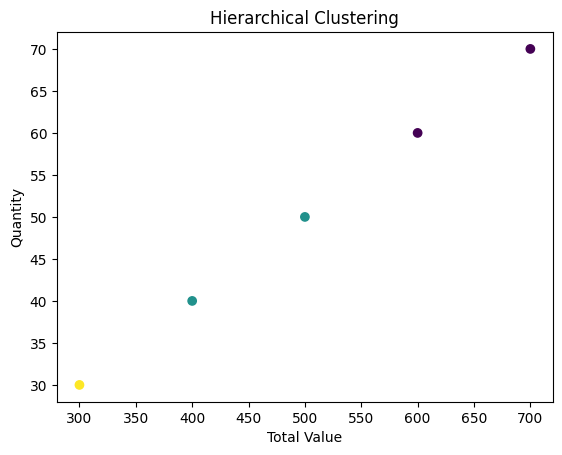

In [24]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
customer_data['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

plt.scatter(customer_data['TotalValue'], customer_data['Quantity'], c=customer_data['Hierarchical_Cluster'], cmap='viridis')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.title('Hierarchical Clustering')
plt.show()


In [25]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.19999999999999996


In [26]:
cluster_profile = customer_data.groupby('Cluster').mean()
print(cluster_profile)


         CustomerID  TotalValue  Quantity  Cluster_3D  DBSCAN_Cluster  \
Cluster                                                                 
0               3.5       650.0      65.0         1.0            -1.0   
1               3.5       350.0      35.0         1.0            -1.0   
2               1.0       500.0      50.0         2.0            -1.0   

         Hierarchical_Cluster  
Cluster                        
0                         0.0  
1                         1.5  
2                         1.0  


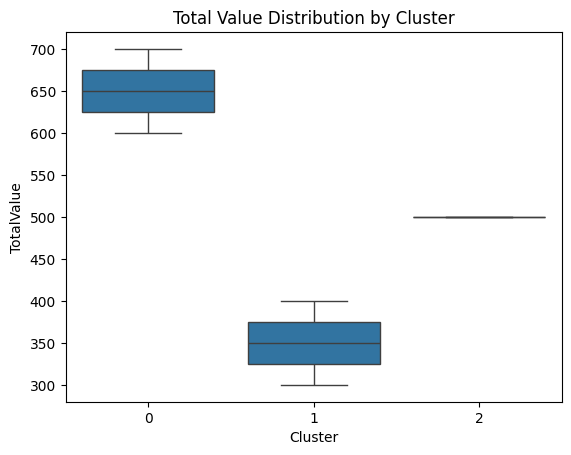

In [27]:
import seaborn as sns

sns.boxplot(x='Cluster', y='TotalValue', data=customer_data)
plt.title('Total Value Distribution by Cluster')
plt.show()
